In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("CrimeConnected.csv")

/Users/quangpham/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (4,7,9,10,12,13,14,16,17,18,19,20,21,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
CrimeType=df['CrimeType']

In [5]:
CrimeType.value_counts()[:40]

Murder or Manslaughter:Yes         439444
larceny/theft                      268292
theft                              206732
all other offenses                 205465
Murder or Manslaughter:No          189894
battery                            188251
assault                            153630
other offenses                     136672
narcotics                          132399
non-criminal                       128649
criminal damage                    126521
thefts                             125082
other assaults                     123269
burglary                           120946
traffic accident                   120189
vandalism/criminal mischief         97158
all other crimes                    82485
theft from vehicle                  79497
fraud                               73982
robbery                             73016
larceny                             72233
vandalism                           71219
motor vehicle theft                 68351
narcotic / drug law violations    

In [6]:
VehicleTheft=[]
for i in CrimeType:
    i=i.lower()
    if ('vehicle' in i and 'accident' not in i):
        if i not in VehicleTheft:
            VehicleTheft.append(i)
VehicleTheft

['larceny from motor vehicle',
 'motor vehicle theft',
 'theft from motor vehicle',
 'theft from vehicle',
 'recovered stolen motor vehicle',
 'vehicle theft',
 'recovered vehicle']

In [7]:
robbery=[]# add burgaly, larceny,theft
for i in CrimeType:
    i=i.lower()
    if ('robbery' in i or 'burgaly' in i or 'theft' in i or 'larceny' in i and 'vehicle' not in i ):
        if i not in robbery:
            robbery.append(i)
robbery

['larceny',
 'auto theft',
 'robbery',
 'auto theft recovery',
 'theft',
 'motor vehicle theft',
 'theft from motor vehicle',
 'thefts',
 'theft from vehicle',
 'robbery no firearm',
 'robbery firearm',
 'vehicle theft',
 'larceny/theft']

In [8]:
assault=[] #battery, offense
for i in CrimeType:
    i=i.lower()
    if ('assault' in i or 'battery' in i or 'offense' in i or 'dispute' in i):
        if i not in assault:
            assault.append(i)
droplist=['crim sexual assault','sexual assault','sex offense', 'other sex offenses (not commercialized)','sex offenses, forcible','sex offenses, non forcible']
for j in droplist:
    assault.remove(j)
assault

['verbal disputes',
 'simple assault',
 'aggravated assault',
 'landlord/tenant disputes',
 'offenses against child / family',
 'other offense',
 'battery',
 'assault',
 'offense involving children',
 'other assaults',
 'all other offenses',
 'aggravated assault firearm',
 'aggravated assault no firearm',
 'offenses against family and children',
 'other offenses',
 'family offenses',
 'armed assault',
 'unarmed assault']

In [23]:
drug=[]#nacrotic, drug
for i in CrimeType:
    i=i.lower()
    if ('nacortic' in i or 'drug' in i or 'narcotics' in i or 'liquor' in i) :
        if i not in drug:
            drug.append(i)
drug

['drug violation',
 'liquor violation',
 'narcotics',
 'liquor law violation',
 'drug & alcohol',
 'narcotic / drug law violations',
 'liquor law violations',
 'drug/narcotic',
 'liquor laws']

In [10]:
others=[]#other
for i in CrimeType:
    i=i.lower()
    if ('other' in i) :
        if i not in others:
            others.append(i)
droplist=['other burglary','other offense','other narcotic violation','other assaults','all other offenses','other sex offenses (not commercialized)','other offenses']
for j in droplist:
    others.remove(j)
others 

['other',
 'all other crimes',
 'other crimes against persons',
 'shot and tasered:other',
 'shot:other']

In [11]:
fraud=[]#fraud
for i in CrimeType:
    i=i.lower()
    if ('fraud' in i) :
        if i not in fraud:
            fraud.append(i)
fraud

['fraud']

In [12]:
vandalism=[]#fraud
for i in CrimeType:
    i=i.lower()
    if ('vandalism' in i) :
        if i not in vandalism:
            vandalism.append(i)
vandalism

['vandalism', 'vandalism/criminal mischief']

In [14]:
sexual=[]#sexual
for i in CrimeType:
    i=i.lower()
    if ('sex' in i) :
        if i not in sexual:
            sexual.append(i)
sexual

['crim sexual assault',
 'sex offense',
 'sexual assault',
 'other sex offenses (not commercialized)',
 'sex offenses, forcible',
 'sex offenses, non forcible']

In [15]:
warrant=[]#warrant
for i in CrimeType:
    i=i.lower()
    if ('warrant' in i) :
        if i not in warrant:
            warrant.append(i)
warrant

['warrant arrests', 'search warrants', 'warrants']

In [16]:
missing=[]#missing
for i in CrimeType:
    i=i.lower()
    if ('missing' in i) :
        if i not in missing:
            missing.append(i)
missing

['missing person reported', 'missing person located', 'missing person']

In [17]:
suspicious=[] #deceptive
for i in CrimeType:
    i=i.lower()
    if('suspicious' in i or 'deceptive' in i or 'investigate' in i):
        if i not in suspicious:
            suspicious.append(i)
suspicious

['investigate property',
 'investigate person',
 'deceptive practice',
 'suspicious occ']

In [18]:
trespass=[]
for i in CrimeType:
    i=i.lower()
    if('trespass' in i):
        if i not in trespass:
            trespass.append(i)
trespass

['criminal trespass', 'trespass']

In [19]:
disorder=[]
for i in CrimeType:
    i=i.lower()
    if('disorder' in i or 'medical' in i):
        if i not in disorder:
            disorder.append(i)
disorder

['medical assistance', 'disorderly conduct', 'public disorder']

In [20]:
accident=[]
for i in CrimeType:
    i=i.lower()
    if('accident' in i or 'driving' in i):
        if i not in accident:
            accident.append(i)
accident


['motor vehicle accident response',
 'traffic accident',
 'driving under the influence']

In [21]:
prostitution=[]
for i in CrimeType:
    i=i.lower()
    if('prostitution' in i):
        if i not in prostitution:
            prostitution.append(i)
prostitution


['prostitution', 'prostitution and commercialized vice']

In [22]:
weapon=[]
for i in CrimeType:
    i=i.lower()
    if('weapon' in i):
        if i not in weapon:
            weapon.append(i)
weapon

['weapons violation', 'weapon violations', 'weapon laws']

In [24]:
propertyl=[]
for i in CrimeType:
    i=i.lower()
    if('property' in i):
        if i not in propertyl:
            propertyl.append(i)
propertyl

['investigate property',
 'property lost',
 'property found',
 'property related damage',
 'recovered stolen property',
 'burglary - no property taken',
 'receiving stolen property',
 'stolen property']

In [25]:
typelist={"Vehicle":VehicleTheft,"robbery":robbery,"assault":assault,"drug":drug,"others":others,"fraud":fraud,"vandalism":vandalism,"sexual":sexual,"warrant":warrant,"missing":missing,"suspicious":suspicious,"trespass":trespass,"disorder":disorder,"accident":accident,"prostitution":prostitution,"weapon":weapon,"property":propertyl}

In [26]:
keys=[]
for i in typelist.keys():
    keys.append(i)

In [27]:
CrimeMap=[]
for i in CrimeType:
    k=0
    for j in keys:
        if i in typelist[j]:
            CrimeMap.append(str(j))
            k=1
            break
    if k==0:
        CrimeMap.append(i)
        

In [28]:
len(CrimeMap)

4571223

In [29]:
len(CrimeType)

4571223

In [30]:
df['CrimeMap']=CrimeMap

In [44]:
df.to_csv("CrimeConnected.csv")

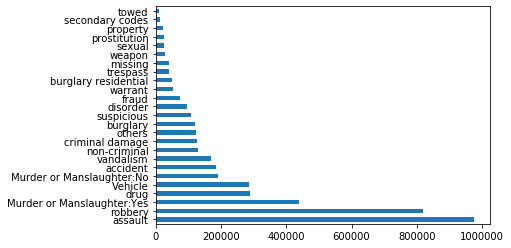

In [32]:
df['CrimeMap'].value_counts()[:25].plot(kind='barh')

In [33]:
statedata=pd.read_csv("5states.csv")
policeshoot=pd.read_csv("FinalShooting.csv")
massshoot=pd.read_csv("FinalMass.csv")
USgbt=pd.read_csv("FinalUSgbt.csv")
HomiSet=pd.read_csv("HomiFinal.csv")
statedb=pd.read_csv("Countstate.csv")

/Users/quangpham/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/quangpham/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
dborigin=[]
for i in statedb['0']:
    dborigin.append(i)
for i in range(len(policeshoot)):
    dborigin.append("policefataldb")
for i in range(len(massshoot)):
    dborigin.append("massshootingdb")
for i in range(len(USgbt)):
    dborigin.append("USgbtdb")
for i in range(len(df)-len(dborigin)):
    dborigin.append("Homicidedb")

In [35]:
len(dborigin)

4571223

In [36]:
df['DataBase']=dborigin

In [43]:
df[-4:-2]

,Unnamed: 0,Date,CrimeType,CrimeDetail,Lat,Long,LocDescription,City,Street,State,...,PerpeGender,PerpeAge,PerpeNationlatiy,PerpeVicRelation,Weapon,Motivation,NewsCoverage,Property,CrimeMap,DataBase
4571219,4571219,2014-June,Murder or Manslaughter:Yes,NaN,NaN,NaN,NaN,Sheridan,NaN,Wyoming,...,Male,57,NaN,Acquaintance,Handgun,NaN,NaN,NaN,Murder or Manslaughter:Yes,Homicidedb
4571220,4571220,2014-September,Murder or Manslaughter:Yes,NaN,NaN,NaN,NaN,Sheridan,NaN,Wyoming,...,Female,22,NaN,Daughter,Suffocation,NaN,NaN,NaN,Murder or Manslaughter:Yes,Homicidedb


In [5]:
df1=df['CrimeMap'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [7]:
df1.to_csv("CrimeGroup.csv")